Classificação - Base de Dados Iris

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_iris = pd.read_csv('/content/drive/MyDrive/Mestrado/Intro - Aprendizado Máquina/tp2/iris.csv')

In [ ]:
cls = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}
df_iris['class'] = df_iris.apply(lambda x: cls[x.variety], axis=1)

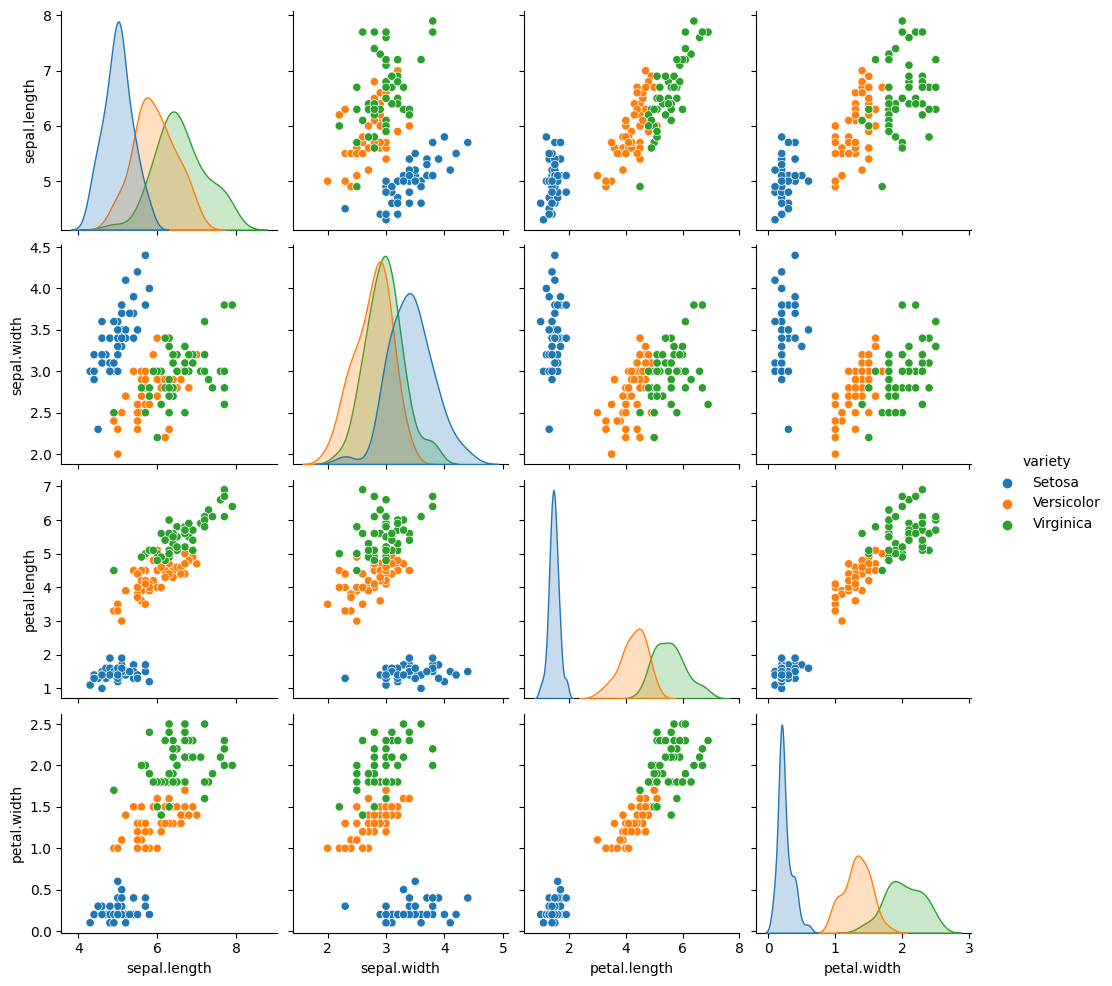

In [ ]:
sns.pairplot(df_iris.iloc[:, 0:-1], hue='variety')
plt.show()

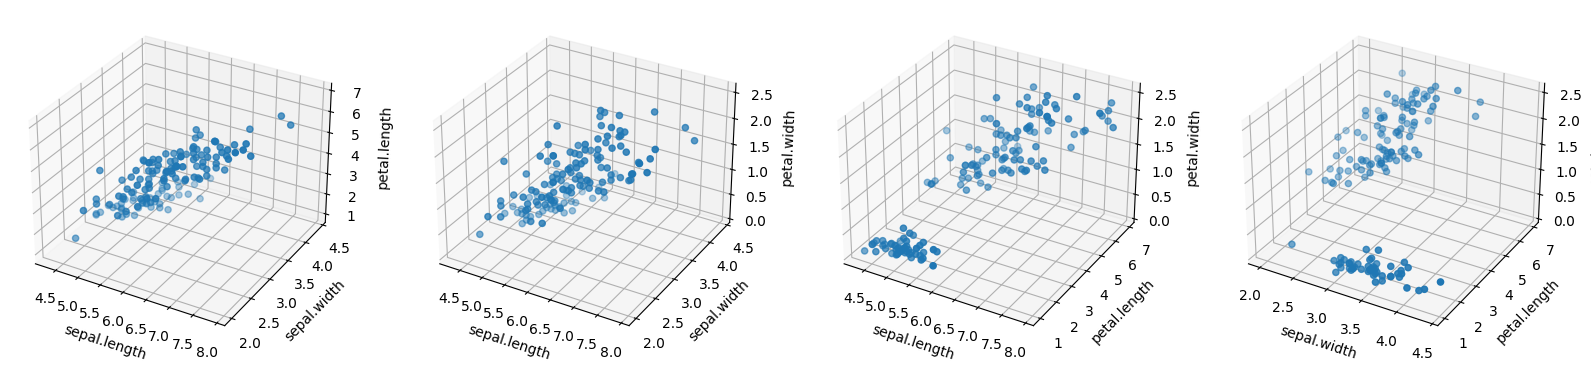

In [ ]:
fig = plt.figure(figsize=(20, 30))
ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.scatter3D(df_iris['sepal.length'], df_iris['sepal.width'], df_iris['petal.length'])
ax.set_xlabel('sepal.length')
ax.set_ylabel('sepal.width')
ax.set_zlabel('petal.length')
ax = fig.add_subplot(1, 4, 2, projection='3d')
ax.scatter3D(df_iris['sepal.length'], df_iris['sepal.width'], df_iris['petal.width'])
ax.set_xlabel('sepal.length')
ax.set_ylabel('sepal.width')
ax.set_zlabel('petal.width')
ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.scatter3D(df_iris['sepal.length'], df_iris['petal.length'], df_iris['petal.width'])
ax.set_xlabel('sepal.length')
ax.set_ylabel('petal.length')
ax.set_zlabel('petal.width')
ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.scatter3D(df_iris['sepal.width'], df_iris['petal.length'], df_iris['petal.width'])
ax.set_xlabel('sepal.width')
ax.set_ylabel('petal.length')
ax.set_zlabel('petal.width')
plt.show()

Gaussian Naive Bayes

In [ ]:
x_train, x_test, y_train, y_test =  train_test_split(df_iris.iloc[:, 0:-2].values, df_iris.iloc[:, -2].values, test_size=.3)

In [ ]:
def get_var(x, y, cls):
    return np.array([np.var(feats) for feats in x[y == cls, :].T])

def get_mean(x, y, cls):
    return np.array([np.mean(feats) for feats in x[y == cls, :].T])

def get_zeros(rows, columns):
    return np.zeros((rows, columns))

def naive_gaussian(x, mu, sigma):
    return (1 / np.sqrt(2 * np.pi * sigma)) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

def train_gaussian(x, y):
    priori_set = np.count_nonzero(y_train == 'Setosa')/ x.shape[0]
    priori_ver = np.count_nonzero(y_train == 'Versicolor') / x.shape[0]
    priori_vir = np.count_nonzero(y_train == 'Virginica') / x.shape[0]
    mu = get_zeros(len(np.unique(y_train)), x_train.shape[1])
    sigma = get_zeros(len(np.unique(y_train)), x_train.shape[1])
    mu[0, :] = get_mean(x, y, 'Setosa')
    sigma[0, :] = get_var(x, y, 'Setosa')
    mu[1, :] = get_mean(x, y, 'Versicolor')
    sigma[1, :] = get_var(x, y, 'Versicolor')
    mu[2, :] = get_mean(x, y, 'Virginica')
    sigma[2, :] = get_var(x, y, 'Virginica')
    return mu, sigma, priori_set, priori_ver, priori_vir

def classif_gaussian(x, mu, sigma, prior_set, prior_ver, prior_vir):
    pbs = np.sum(np.log(naive_gaussian(x, mu[0], sigma[0])))
    pbve = np.sum(np.log(naive_gaussian(x, mu[1], sigma[1])))
    pbvi = np.sum(np.log(naive_gaussian(x, mu[2], sigma[2])))
    poster_set = pbs + np.log(prior_set)
    poster_ver = pbve + np.log(prior_ver)
    poster_vir = pbvi + np.log(prior_vir)
    return np.argmax([poster_set, poster_ver, poster_vir])

def acc_score(y_pred, y_real):
    return np.sum(y_pred == y_real) / len(y_real)

In [ ]:
mu, sigma, priori_set, priori_ver, priori_vir = train_gaussian(x_train, y_train)
cls = ['Setosa', 'Versicolor', 'Virginica']
y_pred_gaussian = [cls[classif_gaussian(x_test[i], mu, sigma, priori_set, priori_ver, priori_vir)] for i in range(len(y_test))]

KNN

In [ ]:
def get_major_class(y):
    cls = ['Setosa', 'Versicolor', 'Virginica']
    y_temp = list(y)
    maj_class = [y_temp.count(i) for i in cls]
    return cls[maj_class.index(max(maj_class))]

def classif_knn(new_x, x, y, k):
    diff = np.tile(new_x, (x.shape[0], 1)) - x
    dists = np.sqrt(np.sum(diff ** 2, axis=1))
    indexes = np.argsort(dists)[0:k]
    neigbhs = y_train[indexes]
    return get_major_class(neigbhs)

In [ ]:
y_pred_knn = [classif_knn(x_test[i], x_train, y_train, 3) for i in range(len(y_test))]

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)

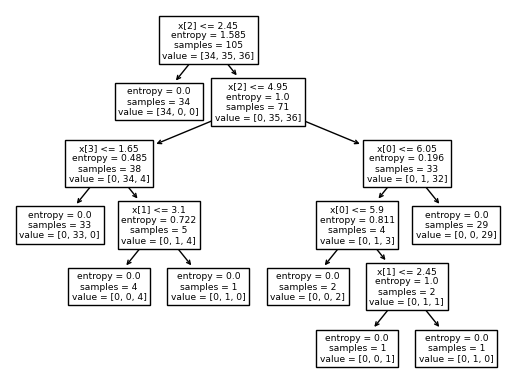

In [ ]:
plot_tree(tree)
plt.show()

Comparação 3 classificadores

In [ ]:
x_train, x_test, y_train, y_test =  train_test_split(df_iris.iloc[:, 0:-2].values, df_iris.iloc[:, -2].values, test_size=.35)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=.3)

In [ ]:
# Gaussian
mu, sigma, priori_set, priori_ver, priori_vir = train_gaussian(x_train, y_train)
cls = ['Setosa', 'Versicolor', 'Virginica']

# Decision Tree
tree = DecisionTreeClassifier(criterion='entropy', max_depth=10)
tree.fit(x_train, y_train)

acc_test_gaussian, acc_test_knn, acc_test_tree = [], [], []
acc_val_gaussian, acc_val_knn, acc_val_tree = [], [], []

for i in range(10):
    y_pred_test_gaussian = [cls[classif_gaussian(x_test[i], mu, sigma, priori_set, priori_ver, priori_vir)] for i in range(len(y_test))]
    y_pred_val_gaussian = [cls[classif_gaussian(x_val[i], mu, sigma, priori_set, priori_ver, priori_vir)] for i in range(len(y_val))]
    acc_test_gaussian.append(acc_score(y_pred_test_gaussian, y_test))
    acc_val_gaussian.append(acc_score(y_pred_val_gaussian, y_val))

    y_pred_test_knn = [classif_knn(x_test[i], x_train, y_train, 3) for i in range(len(y_test))]
    y_pred_val_knn = [classif_knn(x_val[i], x_train, y_train, 3) for i in range(len(y_val))]
    acc_test_knn.append(acc_score(y_pred_test_knn, y_test))
    acc_val_knn.append(acc_score(y_pred_val_knn, y_val))

    y_pred_test_tree = tree.predict(x_test)
    y_pred_val_tree = tree.predict(x_val)
    acc_test_tree.append(acc_score(y_pred_test_tree, y_test))
    acc_val_tree.append(acc_score(y_pred_val_tree, y_val))

print(f'Média Acurácia Teste Gaussian: {np.mean(acc_test_gaussian)}\nMédia Acurácia Validação Gaussian: {np.mean(acc_val_gaussian)}\n')
print(f'Média Acurácia Teste KNN: {np.mean(acc_test_knn)}\nMédia Acurácia Validação KNN: {np.mean(acc_val_knn)}\n')
print(f'Média Acurácia Teste Tree: {np.mean(acc_test_tree)}\nMédia Acurácia Validação Tree: {np.mean(acc_val_tree)}')

Média Acurácia Teste Gaussian: 0.9459459459459459
Média Acurácia Validação Gaussian: 1.0

Média Acurácia Teste KNN: 0.918918918918919
Média Acurácia Validação KNN: 1.0

Média Acurácia Teste Tree: 0.9459459459459459
Média Acurácia Validação Tree: 0.9375


K-means

In [ ]:
x = df_iris.iloc[:, :-2]

def get_centroids(x, k):
    centroids = x.sample(k).values
    return centroids

def get_dist(a, b):
    return np.sqrt(np.sum(a - b) ** 2)

def kmeans(x, k, max_it):
    clusters = np.zeros((x.shape[0], 2))
    centroids = get_centroids(x, k)
    clt_same = True
    it = 0
    x = x.iloc[:, :].values
    while it > max_it or clt_same:
        clt_same = False
        for i in range(x.shape[0]):
            min_dist = np.inf
            index = None
            for j in range(k):
                dist = get_dist(centroids[j, :], x[i, :])
                if dist < min_dist:
                    min_dist = dist
                    index = j
            if clusters[i, 0] != index:
                clt_same = True
            clusters[i, :] = index, min_dist ** 2
        for c in range(k):
            all_data = x[clusters[:, 0] == c]
            centroids[c, :] = np.mean(all_data, axis=0)
        it += 1
    return centroids, clusters

centroids, clusters = kmeans(x, 3, 10)

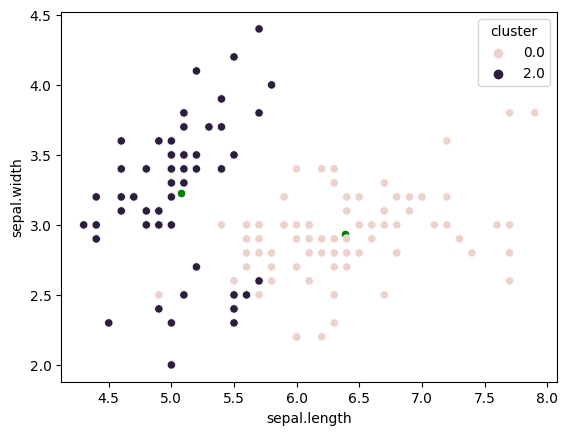

In [ ]:
xplot = x.iloc[:, 0:2]
xplot['cluster'] = clusters[:, 0]
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='green')
sns.scatterplot(data=xplot, x='sepal.length', y='sepal.width', hue='cluster')
plt.show()

Classificação - Base de Dados Bi-dimensional

In [ ]:
df_aluno = pd.read_csv('/content/drive/MyDrive/Mestrado/Intro - Aprendizado Máquina/tp2/ex2data1.txt', header=None)
df_aluno.columns = ['aval1', 'aval2', 'resultado']

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import time

In [ ]:
cv = 10

gnb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

gnb_st_time = time.time()
gnb_cross = cross_val_score(gnb, x_train, y_train, cv=cv)
gnb_ed_time = time.time()

knn_st_time = time.time()
knn_cross = cross_val_score(knn, x_train, y_train, cv=cv)
knn_ed_time = time.time()

dt_st_time = time.time()
dt_cross = cross_val_score(dt, x_train, y_train, cv=cv)
dt_ed_time = time.time()

print(f'Acurácia média GNB: {np.mean(gnb_cross)} em {gnb_ed_time - gnb_st_time} segundos.')
print(f'Acurácia média KNN: {np.mean(knn_cross)} em {knn_ed_time - knn_st_time} segundos.')
print(f'Acurácia média DT: {np.mean(dt_cross)} em {dt_ed_time - dt_st_time} segundos.')

Acurácia média GNB: 0.9588888888888889 em 0.028716087341308594 segundos.
Acurácia média KNN: 0.9788888888888888 em 0.031070232391357422 segundos.
Acurácia média DT: 0.9288888888888888 em 0.015898466110229492 segundos.


Classificação - Base Câncer de Mama

In [ ]:
df_cancer = pd.read_csv('/content/drive/MyDrive/Mestrado/Intro - Aprendizado Máquina/tp2/breast+cancer+wisconsin+diagnostic/wdbc.data')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X = mm.fit_transform(df_cancer.iloc[:, 2:])
x_train, x_test, y_train, y_test = train_test_split(X, df_cancer.iloc[:, 1].values, test_size=.35)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=.3)

In [ ]:
def get_var(x, y, cls):
    return np.array([np.var(feats) for feats in x[y == cls, :].T])

def get_mean(x, y, cls):
    return np.array([np.mean(feats) for feats in x[y == cls, :].T])

def get_zeros(rows, columns):
    return np.zeros((rows, columns))

def naive_gaussian(x, mu, sigma):
    return (1 / np.sqrt(2 * np.pi * sigma)) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

def train_gaussian(x, y):
    priori_m = np.count_nonzero(y_train == 'M')/ x.shape[0]
    priori_b = np.count_nonzero(y_train == 'B') / x.shape[0]
    mu = get_zeros(len(np.unique(y_train)), x_train.shape[1])
    sigma = get_zeros(len(np.unique(y_train)), x_train.shape[1])
    mu[0, :] = get_mean(x, y, 'M')
    sigma[0, :] = get_var(x, y, 'M')
    mu[1, :] = get_mean(x, y, 'B')
    sigma[1, :] = get_var(x, y, 'B')
    return mu, sigma, priori_m, priori_b

def classif_gaussian(x, mu, sigma, prior_m, prior_b):
    pbm = np.sum(np.log(naive_gaussian(x, mu[0], sigma[0])))
    pbb = np.sum(np.log(naive_gaussian(x, mu[1], sigma[1])))
    poster_m = pbm + np.log(prior_m)
    poster_b = pbb + np.log(prior_b)
    return np.argmax([prior_m, prior_b])

In [ ]:
def get_major_class(y):
    cls = ['M', 'B']
    y_temp = list(y)
    maj_class = [y_temp.count(i) for i in cls]
    return cls[maj_class.index(max(maj_class))]

def classif_knn(new_x, x, y, k):
    diff = np.tile(new_x, (x.shape[0], 1)) - x
    dists = np.sqrt(np.sum(diff ** 2, axis=1))
    indexes = np.argsort(dists)[0:k]
    neigbhs = y_train[indexes]
    return get_major_class(neigbhs)

In [ ]:
# Gaussian
mu, sigma, priori_m, priori_b, = train_gaussian(x_train, y_train)
cls = ['M', 'B']

# Decision Tree
tree = DecisionTreeClassifier(criterion='entropy', max_depth=10)
tree.fit(x_train, y_train)

acc_test_gaussian, acc_test_knn, acc_test_tree = [], [], []
acc_val_gaussian, acc_val_knn, acc_val_tree = [], [], []

for i in range(10):
    y_pred_test_gaussian = [cls[classif_gaussian(x_test[i], mu, sigma, priori_m, priori_b)] for i in range(len(y_test))]
    y_pred_val_gaussian = [cls[classif_gaussian(x_val[i], mu, sigma, priori_m, priori_b)] for i in range(len(y_val))]
    acc_test_gaussian.append(acc_score(y_pred_test_gaussian, y_test))
    acc_val_gaussian.append(acc_score(y_pred_val_gaussian, y_val))

    y_pred_test_knn = [classif_knn(x_test[i], x_train, y_train, 3) for i in range(len(y_test))]
    y_pred_val_knn = [classif_knn(x_val[i], x_train, y_train, 3) for i in range(len(y_val))]
    acc_test_knn.append(acc_score(y_pred_test_knn, y_test))
    acc_val_knn.append(acc_score(y_pred_val_knn, y_val))

    y_pred_test_tree = tree.predict(x_test)
    y_pred_val_tree = tree.predict(x_val)
    acc_test_tree.append(acc_score(y_pred_test_tree, y_test))
    acc_val_tree.append(acc_score(y_pred_val_tree, y_val))

print(f'Média Acurácia Teste Gaussian: {np.mean(acc_test_gaussian)}\nMédia Acurácia Validação Gaussian: {np.mean(acc_val_gaussian)}\n')
print(f'Média Acurácia Teste KNN: {np.mean(acc_test_knn)}\nMédia Acurácia Validação KNN: {np.mean(acc_val_knn)}\n')
print(f'Média Acurácia Teste Tree: {np.mean(acc_test_tree)}\nMédia Acurácia Validação Tree: {np.mean(acc_val_tree)}')

Média Acurácia Teste Gaussian: 0.642857142857143
Média Acurácia Validação Gaussian: 0.6333333333333332

Média Acurácia Teste KNN: 0.9714285714285713
Média Acurácia Validação KNN: 0.9499999999999998

Média Acurácia Teste Tree: 0.9642857142857142
Média Acurácia Validação Tree: 0.9333333333333333


Regressão - Base de Dados Food Truck

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
df_food = pd.read_csv('/content/drive/MyDrive/Mestrado/Intro - Aprendizado Máquina/tp2/ex1data1.txt', header=None)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_food.iloc[:, 0].values, df_food.iloc[:, 1].values, test_size=.2)

In [ ]:
def get_regression_value(y):
    return np.mean(y)

def regress_knn(new_x, x, y, k):
    diff = np.tile(new_x, (x.shape[0], 1)) - x
    dists = np.sqrt(np.sum(diff ** 2, axis=1))
    indexes = np.argsort(dists)[0:k]
    neigbhs = y_train[indexes]
    return get_regression_value(neigbhs)

In [ ]:
# Decision Tree
tree = DecisionTreeRegressor()
tree.fit(x_train.reshape(-1, 1), y_train)

y_pred_knn = [regress_knn(x_test[i], x_train, y_train, 3) for i in range(len(y_test))]
y_pred_tree = tree.predict(x_test.reshape(-1, 1))

print(f'Erro Médio Quadrático KNN: {mean_squared_error(y_pred_knn, y_test)}')
print(f'Erro Médio Quadrático Tree: {mean_squared_error(y_pred_tree, y_test)}')

Erro Médio Quadrático KNN: 23.222417656866114
Erro Médio Quadrático Tree: 21.26625425035
